In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scistats
import statsmodels.api as sm
%matplotlib inline

# Membaca Dataset

In [2]:
# mengantisipasi untuk unstandard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN']
df_nyc_sales = pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)

In [3]:
df_nyc_sales.head(30)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


# Mengetahui dimensi dari dataset

In [4]:
df_nyc_sales.shape

(84548, 22)

# Mengetahui kolom pada data

In [5]:
df_nyc_sales.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

# Mengetahui adanya null values dan tipe data dari setiap kolom

In [6]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

# Mengetahui nilai unik dari setiap kolom untuk melihat adanya anomali (unstandard missing values)

In [7]:
for col in df_nyc_sales.columns:
    print("UNIQUE VALUES FOR ",col)
    print("="*20)
    print(df_nyc_sales[col].unique())
    print("="*20)

UNIQUE VALUES FOR  Unnamed: 0
[    4     5     6 ... 26737 26738 26739]
UNIQUE VALUES FOR  BOROUGH
[1 2 3 4 5]
UNIQUE VALUES FOR  NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CR

 '49 PITNEY AVENUE' '2730 ARTHUR KILL ROAD' '155 CLAY PIT ROAD']
UNIQUE VALUES FOR  APARTMENT NUMBER
[' ' 'RES' 'UNIT1' ... '115' 'MS-B' '363']
UNIQUE VALUES FOR  ZIP CODE
[10009     0 10002 10011 10001 10014 10010 10013 10038 10007 10036 10019
 10018 10003 10005 10004 10006 10016 10012 10026 10030 10031 10027 10035
 10037 10029 10039 10032 10128 10463 10034 10025 10022 10017 10167 10023
 10105 10033 10044 10280 10282 10281 10065 10021 10075 10028 10024 10069
 10040 10457 10458 10451 10456 10469 10466 10475 10468 10467 10460 10473
 10472 10464 10462 10803 10465 10459 10471 10453 10452 10454 10474 10455
 10461 10470 11228 11214 11220 11209 11219 11221 11233 11213 11206 11216
 11205 11238 11226 11204 11234 11217 11201 11218 11232 11230 11235 11212
 11237 11207 11236 11239 11231 11249 11224 11225 11208 11210 11203 11229
 11215 11223 11222 11211 11370 11691 11692 11102 11106 11103 11377 11105
 11101 11361 11360 11357 11358 11364 11693 11694 11426 11428 11004 11001
 11435 11411 11356 11354 

## Analisis

Pada beberapa kolom masih terdapat unstandard missing values yang tidak berhasil diidentifikasi oleh Pandas sebagai missing values. Berikut ini adalah rangkumannya:

1. Kolom "Unnamed: 0" sebagai iterator dan tidak diperlukan untuk analisis berikutnya, sehingga akan didrop
2. Kolom 'TAX CLASS AT PRESENT' mengandung nilai (' ') yang diidentifikasi sebagai missing values
3. Kolom 'EASE-MENT' tidak mengandung informasi dan hanya memuat satu nilai (' ') yang diidentifikasi sebagai missing values, sehingga untuk selanjutnya akan dibuang
4. Kolom 'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER' mengandung nilai (' ') yang diidentifikasi sebagai missing values.
5. Kolom 'ZIP CODE', 'YEAR BUILT', 'TOTAL UNITS' mengandung nilai (0) yang diidentifikasi sebagai missing values
6. Kolom 'SALE PRICE' mengandung nilai (' - ') yang diidentifikasi sebagai missing values, selanjutnya nilai ini akan diganti dengan 0 dan dianggap tidak ada transaksi

# Baca ulang dataset dengan menambahkan unstandard missing values

In [9]:
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' -  ']
df_nyc_sales = pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)

In [10]:
# Replacing 0 in YEAR BUILT, ZIP CODE, TOTAL UNIT with np.nan
df_nyc_sales['YEAR BUILT']=df_nyc_sales['YEAR BUILT'].replace({0:np.nan})
df_nyc_sales['ZIP CODE']=df_nyc_sales['ZIP CODE'].replace({0:np.nan})
df_nyc_sales['TOTAL UNITS']=df_nyc_sales['TOTAL UNITS'].replace({0:np.nan})

# Mengecek ulang adanya missing values (unstandard missing values)

In [11]:
df_nyc_sales.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Terlihat bahwa setelah dimasukkan simbol-simbol baru yang menandakan unstandard missing values, terdapat beberapa missing values

# Menghapus kolom-kolom yang tidak diperlukan

1. Kolom Unnamed: 0 sebagai iterator
2. Kolom EASE-MENT tidak mengandung nilai yang dibutuhkan untuk analisis berikutnya
3. Kolom ADDRESS dan APARTMENT NUMBER adalah kolom yang tidak diperlukan untuk analisis berikutnya

In [12]:
unnecessary_columns = ['Unnamed: 0', 'EASE-MENT','ADDRESS','APARTMENT NUMBER']
df_nyc_sales.drop(unnecessary_columns,inplace=True, axis=1)

In [13]:
# show dataframe after remove unnecessary columns
df_nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,10009.0,28,3,31.0,4616.0,18690.0,1900.0,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009.0,16,1,17.0,2212.0,7803.0,1900.0,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00


# Mengecek jumlah missing values pada setiap kolom

In [14]:
df_nyc_sales.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

# Mengganti nilai missing values pada kolom kategorik dengan nilai modusnya

In [15]:
categoricals_columns = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT']
for cat_col in categoricals_columns:
    df_nyc_sales[cat_col].fillna(df_nyc_sales[cat_col].mode()[0],inplace=True)

# Mengganti nilai missing values untuk kolom numerik (kecuali SALE PRICE) dengan nilai median

Nilai median digunakan untuk mengganti nilai missing values dari setiap kolom (kecuali SALE PRICE) karena cenderung tidak terpengaruh dengan adanya data pencilan

In [16]:
float_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in float_columns:
    df_nyc_sales[float_col].fillna(df_nyc_sales[float_col].median(),inplace=True)

# Menghapus sisa kolom yang masih memuat missing values

Kolom SALE PRICE dan TOTAL UNIT yang memiliki nilai nan tidak bisa diartikan.

In [17]:
df_nyc_sales.dropna(inplace=True)

In [18]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52363 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         52363 non-null  int64  
 1   NEIGHBORHOOD                    52363 non-null  object 
 2   BUILDING CLASS CATEGORY         52363 non-null  object 
 3   TAX CLASS AT PRESENT            52363 non-null  object 
 4   BLOCK                           52363 non-null  int64  
 5   LOT                             52363 non-null  int64  
 6   BUILDING CLASS AT PRESENT       52363 non-null  object 
 7   ZIP CODE                        52363 non-null  float64
 8   RESIDENTIAL UNITS               52363 non-null  int64  
 9   COMMERCIAL UNITS                52363 non-null  int64  
 10  TOTAL UNITS                     52363 non-null  float64
 11  LAND SQUARE FEET                52363 non-null  float64
 12  GROSS SQUARE FEET               

# Mengecek dan menghapus baris duplikat

In [19]:
# check for all duplicates row
df_nyc_sales[
    df_nyc_sales.duplicated()
]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
683,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,774,1042,R4,10001.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,1500000.0,2016-10-05 00:00:00
2296,1,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,24,1123,R4,10004.0,1,0,1.0,2325.0,1680.0,1982.0,2,R4,1200000.0,2017-04-28 00:00:00
3427,1,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,879,1207,R4,10010.0,1,0,1.0,2325.0,1680.0,2009.0,2,R4,716000.0,2017-04-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,908,150,A1,10304.0,1,0,1.0,38862.0,3900.0,1920.0,1,A1,1125000.0,2017-08-02 00:00:00
83207,5,TOMPKINSVILLE,02 TWO FAMILY DWELLINGS,1,114,30,B2,10301.0,2,0,2.0,5781.0,844.0,1942.0,1,B2,250000.0,2017-06-22 00:00:00
83603,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,91,31,A1,10301.0,1,0,1.0,4840.0,2400.0,2005.0,1,A1,585000.0,2016-09-21 00:00:00
83647,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,155,180,A1,10310.0,1,0,1.0,10671.0,2464.0,1899.0,1,A1,725000.0,2017-06-30 00:00:00


In [20]:
# print sum for all duplicates
rows_duplicated = df_nyc_sales.duplicated()
print(rows_duplicated.sum())

367


In [21]:
# drop duplicate row
df_nyc_sales.drop_duplicates(subset=df_nyc_sales.columns,keep='first', inplace=True)
# show records after remove duplicates row
df_nyc_sales.shape

(51996, 18)

## ANALISIS
Ada sejumlah 367 data duplikat, data duplikat ini akan dihapus

# Ubah tipe data setiap kolom sesuai dengan tipe yang seharusnya
Kolom Kategorikal (String) : ('BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT')
Kolom Float (bilangan rasional) : ('SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET')
Kolom Integer (bilangan bulat) : (BLOCK, LOT)

In [22]:
categoricals_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

# ubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categoricals_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('str')

# ubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('float64')

# ubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('int64')

In [23]:
# check tipe data semua kolom setelah diubah
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51996 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         51996 non-null  object 
 1   NEIGHBORHOOD                    51996 non-null  object 
 2   BUILDING CLASS CATEGORY         51996 non-null  object 
 3   TAX CLASS AT PRESENT            51996 non-null  object 
 4   BLOCK                           51996 non-null  int64  
 5   LOT                             51996 non-null  int64  
 6   BUILDING CLASS AT PRESENT       51996 non-null  object 
 7   ZIP CODE                        51996 non-null  object 
 8   RESIDENTIAL UNITS               51996 non-null  int64  
 9   COMMERCIAL UNITS                51996 non-null  int64  
 10  TOTAL UNITS                     51996 non-null  float64
 11  LAND SQUARE FEET                51996 non-null  float64
 12  GROSS SQUARE FEET               

# Mengganti nilai pada kolom 'BOROUGH' dengan nilai yang seharusnya dan menjadi tipe string

In [24]:
df_nyc_sales['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

# Modifikasi kolom 'SALE DATE'
Ubah kolom 'SALE DATE' menjadi tipe datetime serta tambahkan kolom year, month, date, lalu hapus kolom 'SALE DATE'

In [25]:
df_nyc_sales['SALE DATE'] = pd.to_datetime(df_nyc_sales['SALE DATE'])
df_nyc_sales['SALE YEAR'] = df_nyc_sales['SALE DATE'].dt.year
df_nyc_sales['SALE MONTH'] = df_nyc_sales['SALE DATE'].dt.month_name()
df_nyc_sales['SALE DATE dt'] = df_nyc_sales['SALE DATE'].dt.day
df_nyc_sales['SALE DAY'] = df_nyc_sales['SALE DATE'].dt.day_name()
df_nyc_sales.drop('SALE DATE',inplace=True, axis=1)

# rename kolom SALE DATE dt menjadi SALE DATE
df_nyc_sales.rename(columns={'SALE DATE dt':'SALE DATE'},inplace=True)

# Perbarui index dataframe dari 0 - len(df)
Index dataframe perlu direindex ulang karena berantakan setelah dilakukukan preprocessing

In [26]:
df_nyc_sales.index = range(0,len(df_nyc_sales))

In [27]:
df_nyc_sales.shape

(51996, 21)

# Remove Outliers
Apabila data berada kurang dari (Q1 - IQR x 1,5) atau lebih dari (Q3 + IQR x 1,5) maka data itu disebut sebagai data pencilan

In [28]:
# Hitung kuartile 3 setiap atribut pada data
Q3 = df_nyc_sales.quantile(0.75)

# Hitung kuartile 1 setiap atribut pada data
Q1 = df_nyc_sales.quantile(0.25)

# Hitung nilai IQR (selisih Q3 dan Q1)
IQR = Q3 - Q1
steps = 1.5

# Mencari data yang berada dalam rentang (bukan outlier)
df_filtered = df_nyc_sales[
    ~((df_nyc_sales < (Q1 - steps* IQR)) |(df_nyc_sales > (Q3 + steps * IQR))).any(axis=1)
]

# melakukan indexing ulang pada dataframe karena indexnya berantakan setelah dilakukan penghapusan data outliers
df_filtered.index = [i for i in range(len(df_filtered))]
df_nyc_sales = df_filtered

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_8108/569850398.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ~((df_nyc_sales < (Q1 - steps* IQR)) |(df_nyc_sales > (Q3 + steps * IQR))).any(axis=1)


# Menampilkan 5 data teratas

In [29]:
df_nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R2,620000.0,2016,December,30,Friday
1,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R4,762669.0,2016,September,21,Wednesday
2,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R4,772851.0,2016,September,12,Monday
3,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1005,R4,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R4,1034880.0,2016,November,3,Thursday
4,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1009,R4,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R4,800000.0,2016,September,7,Wednesday


# Menampilkan 5 data terbawah

In [30]:
df_nyc_sales.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
31768,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,249,B2,10309.0,2,0,...,4350.0,2840.0,1996.0,1,B2,625000.0,2016,October,18,Tuesday
31769,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,10309.0,2,0,...,3325.0,1300.0,1995.0,1,B2,509000.0,2016,October,31,Monday
31770,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309.0,2,0,...,2400.0,2575.0,1998.0,1,B9,450000.0,2016,November,28,Monday
31771,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309.0,2,0,...,2498.0,2377.0,1998.0,1,B9,550000.0,2017,April,21,Friday
31772,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,10309.0,2,0,...,4000.0,1496.0,1925.0,1,B2,460000.0,2017,July,5,Wednesday


# Menampilkan rangkuman pengecekan missing values


In [31]:
df_nyc_sales.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE YEAR                         0
SALE MONTH                        0
SALE DATE                         0
SALE DAY                          0
dtype: int64

# Pengukuran Tendensi Sentral

In [32]:
print("Mean SALE PRICE = ", df_nyc_sales['SALE PRICE'].mean())
print("Median SALE PRICE = ",df_nyc_sales['SALE PRICE'].median())

Mean SALE PRICE =  573835.3769552765
Median SALE PRICE =  517500.0


In [33]:
# GROSS SQUARE FEET
print("Median GROSS SQUARE FEET = ", df_nyc_sales['GROSS SQUARE FEET'].median())
print("Mean GROSS SQUARE FEET = ", df_nyc_sales['GROSS SQUARE FEET'].mean())

Median GROSS SQUARE FEET =  1680.0
Mean GROSS SQUARE FEET =  1835.175494917068


In [34]:
# LAND SQUARE FEET
print("Median LAND SQUARE FEET = ", df_nyc_sales['LAND SQUARE FEET'].median())
print("Mean LAND SQUARE FEET = ", df_nyc_sales['LAND SQUARE FEET'].mean())

Median LAND SQUARE FEET =  2325.0
Mean LAND SQUARE FEET =  2468.019387530293


In [35]:
cols = ['BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']
for col in cols:
    print("Modus "+col+" = ",df_nyc_sales[col].mode()[0])

Modus BUILDING CLASS CATEGORY =  01 ONE FAMILY DWELLINGS                    
Modus BUILDING CLASS AT PRESENT =  R4
Modus BUILDING CLASS AT TIME OF SALE =  R4


# Measure of Spread

## Range
Implementasi Range digunakan untuk menghitung selisih nilai maksimum dan nilai minimum dari kolom 'GROSS SQUARE FEET' dan 'SALE PRICE'

In [36]:
print('Range GROSS SQUARE FEET = ', (df_nyc_sales['GROSS SQUARE FEET'].max() - df_nyc_sales['GROSS SQUARE FEET'].min()))
print('Range SALE PRICE = ', (df_nyc_sales['SALE PRICE'].max() - df_nyc_sales['SALE PRICE'].min()))

Range GROSS SQUARE FEET =  4050.0
Range SALE PRICE =  2100000.0


## Variance

In [37]:
print('Sampel Variance dari GROSS SQUARE FEET = ', df_nyc_sales['GROSS SQUARE FEET'].var(ddof=1))
print('Sampel Variance dari SALE PRICE = ', df_nyc_sales['SALE PRICE'].var(ddof=1))

Sampel Variance dari GROSS SQUARE FEET =  399625.4996676839
Sampel Variance dari SALE PRICE =  201068107779.60162


## Standard Deviation

In [38]:
print('Sampel Standard Deviation dari GROSS SQUARE FEET = ', df_nyc_sales['GROSS SQUARE FEET'].var(ddof=1)**0.5)
print('Sampel Standard Deviation dari SALE PRICE = ', df_nyc_sales['SALE PRICE'].var(ddof=1)**0.5)

Sampel Standard Deviation dari GROSS SQUARE FEET =  632.1593941939674
Sampel Standard Deviation dari SALE PRICE =  448406.1861522448


# Probability Distribution

## Melihat distribusi dari atribut 'GROSS SQUARE FEET'

Text(0, 0.5, 'Frekuensi')

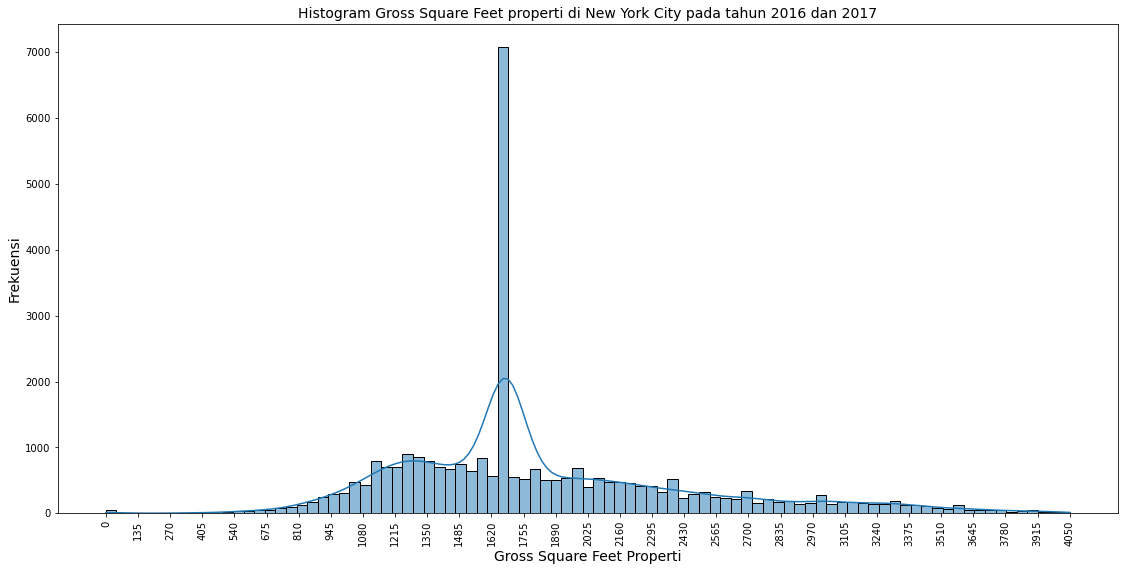

In [39]:
df_gross_square_feet = df_nyc_sales['GROSS SQUARE FEET']
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
count, bin_edge_gross_square_feet = np.histogram(df_gross_square_feet,bins=30)
sns.histplot(df_gross_square_feet,kde=True, ax=ax)
ax.set_title('Histogram Gross Square Feet properti di New York City pada tahun 2016 dan 2017', fontsize=14)
ax.set_xlabel('Gross Square Feet Properti', fontsize=14)
ax.set_xticks(bin_edge_gross_square_feet)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi', fontsize=14)

Dari grafik yang ditampilkan dapat dilihat bahwa distribusi data pada atribut 'GROSS SQUARE FEET' belum berdistribusi normal

## Melakukan Central Limit Theorem agar membuat distribusi menjadi normal
Mengambil sejumlah 1000 sample mean dari sejumlah 100 nilai acak.

In [40]:
n = 100
m = 1000
sample_mean_gross_square_feet = []
for i in range(m):
    sample_values = np.random.choice(a=df_gross_square_feet,size=n)
    sample_mean_gross_square_feet.append(np.mean(sample_values))

## Melihat distribusi dari sampel mean

Text(0, 0.5, 'Frekuensi')

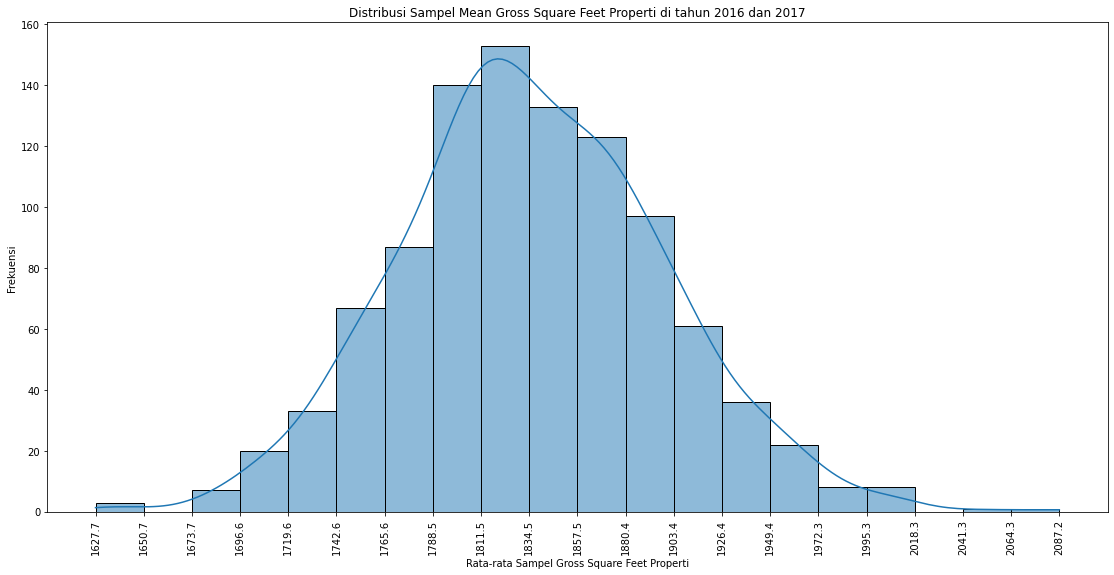

In [41]:
count, bin_edges = np.histogram(sample_mean_gross_square_feet, bins=20)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_mean_gross_square_feet,kde=True, bins=20, ax=ax)
ax.set_title('Distribusi Sampel Mean Gross Square Feet Properti di tahun 2016 dan 2017')
ax.set_xlabel('Rata-rata Sampel Gross Square Feet Properti')
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

Distribusi dari sampel mean sudah normal

## Mengetahui nilai mean, median dan standar deviasi dari sampel mean

In [42]:
sample_means_series = pd.Series(sample_mean_gross_square_feet)

# hitung nilai rata-rata
print('Rata rata sampel mean GROSS SQUARE FEET = ', sample_means_series.mean())
# Hitung nilai median
print('Median sampel mean GROSS SQUARE FEET = ', sample_means_series.median())
# hitung standard deviasi 
print('Standar Deviasi sampel mean GROSS SQUARE FEET = ', sample_means_series.std())

Rata rata sampel mean GROSS SQUARE FEET =  1835.9649699999993
Median sampel mean GROSS SQUARE FEET =  1833.03
Standar Deviasi sampel mean GROSS SQUARE FEET =  62.64129641710741


## Hitung standard error dari sampel mean

In [43]:
# hitung rata-rata dan standar deviasi populasi
pop_std_gross_square = df_gross_square_feet.std()
pop_mean_gross_square = df_gross_square_feet.mean()

# Menghitung jumlah seluruh populasi
number_of_observation = len(df_gross_square_feet)

# Menghitung standar error
standard_error_of_sampel_mean_gross_feet = pop_std_gross_square/np.sqrt(number_of_observation)

## Hitung batas atas dan batas bawah untuk area di mana 95% mean sampel berada dari mean populasi

In [44]:
z_score = 1.96
lower_bound_gross_square = np.mean(sample_mean_gross_square_feet) - z_score*standard_error_of_sampel_mean_gross_feet
upper_bound_gross_square = np.mean(sample_mean_gross_square_feet) + z_score*standard_error_of_sampel_mean_gross_feet
lower_bound_gross_square, upper_bound_gross_square

(1829.0138696843933, 1842.9160703156067)

## Histogram akhir

Text(0.5, 0, 'Sampel Mean Gross Square Feet of New York City Properties')

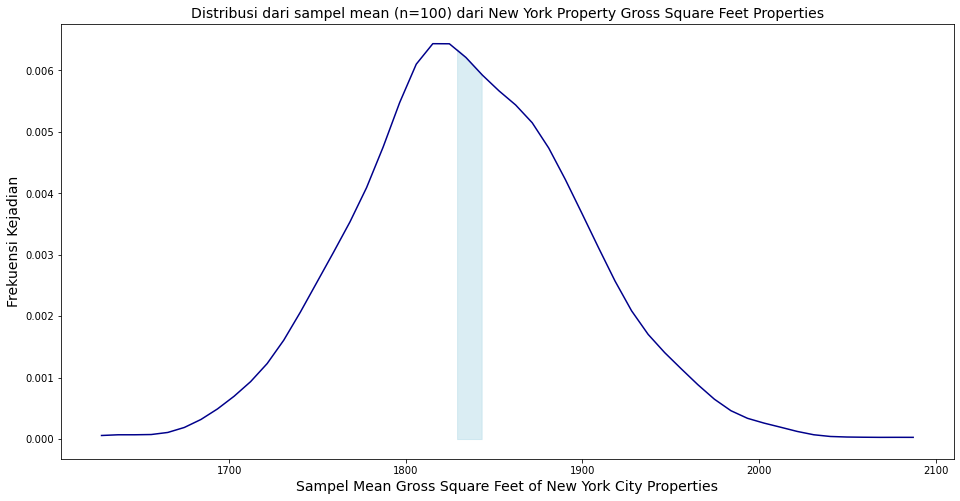

In [45]:
plt.figure(figsize=(16,8))
kde = scistats.gaussian_kde(sample_mean_gross_square_feet)
pos = np.linspace(np.min(sample_mean_gross_square_feet), np.max(sample_mean_gross_square_feet))
plt.plot(pos,kde(pos), color='darkblue')
shade = np.linspace(lower_bound_gross_square,upper_bound_gross_square)
plt.fill_between(shade,kde(shade),alpha=0.45,color='lightblue')
plt.title('Distribusi dari sampel mean (n='+str(n)+') dari New York Property Gross Square Feet Properties', fontsize=14)
plt.ylabel('Frekuensi Kejadian', fontsize=14)
plt.xlabel('Sampel Mean Gross Square Feet of New York City Properties',fontsize=14)

### Analisis
Area di bawah kurva yang diarsir menunjukkan 95% data sampel mean GROSS SQUARE FEET berada pada area ini. Atau dengan kata lain berada dalam rentang +- 1.96 z score dari nilai rata-ratanya.

Kesimpulan : 95% Confidence Interval menyatakan bahwa nilai rata-rata dari luas total semua lantai bangunan properti (GROSS SQUARE FEET) di New York City dari tahun 2016 - 2017 berada dalam rentang (1825.9248896843937) sampai (1839.8270903156063) satuan luas

# Hyphotesis Testing
Apakah rata-rata harga jual bangunan di New York City pada tahun 2017 berbeda secara signifikan dari rata-rata harga jual bangunan di New York City pada tahun 2016?

## Lihat distribusi dari data
Z test dilakukan untuk distribusi data yang normal. Pada tahap ini akan dilihat distribusi dari populasi penjualan bangunan di New York City pada tahun 2016 dan 2017

In [46]:
# mengambil data penjualan (SALE PRICE) untuk tahun 2016
sales_2016 = df_nyc_sales[
    (df_nyc_sales['SALE YEAR']==2016)
]['SALE PRICE']

# mengambil data penjualan (SALE PRICE) untuk tahun 2017
sales_2017 = df_nyc_sales[
    (df_nyc_sales['SALE YEAR']==2017)
]['SALE PRICE']

# menghitung banyak data penjualan (SALE PRICE) pada tahun 2016 dan 2017
len(sales_2016), len(sales_2017)

(11099, 20674)

Text(0, 0.5, 'Frekuensi')

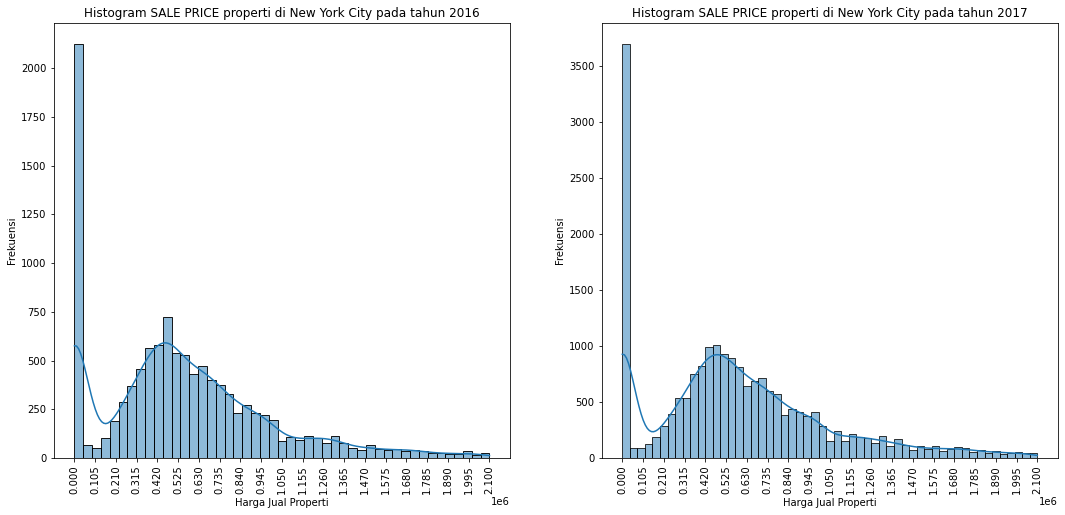

In [47]:
# menampilkan distribusi dari data penjualan 2016 dan 2017
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)

# Plotting for 2016
count, bin_edges_2016 = np.histogram(sales_2016,bins=20)
sns.histplot(sales_2016,kde=True, ax=ax)
ax.set_title('Histogram SALE PRICE properti di New York City pada tahun 2016')
ax.set_xlabel('Harga Jual Properti')
ax.set_xticks(bin_edges_2016)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

# Plotting for 2017
count, bin_edges_2017 = np.histogram(sales_2017,bins=20)
sns.histplot(sales_2017, kde=True, ax=ax0)
ax0.set_title('Histogram SALE PRICE properti di New York City pada tahun 2017')
ax0.set_xlabel('Harga Jual Properti')
ax0.set_xticks(bin_edges_2017)
ax0.tick_params(axis='x', labelrotation=90)
ax0.set_ylabel('Frekuensi')

karena jumlah penjualan bangunan pada tahun 2017 tidak seimbang dengan tahun 2016. Selain itu, grafik distribusi histogram juga menunjukkan bahwa data belum berdistribusi normal. Oleh sebab itu, akan dilakukan sampling sesuai dengan central limit theorem. Sampling akan dilakukan sebanyak 1000 sampel yang diambil dari 100 nilai acak pada masing-masing tahun. Setelah data berdistribusi normal, akan dilakukan z test untuk menguji hipotesis yang sudah dibuat

## Implementasi Central Limit Theorem

Text(0, 0.5, 'Frekuensi')

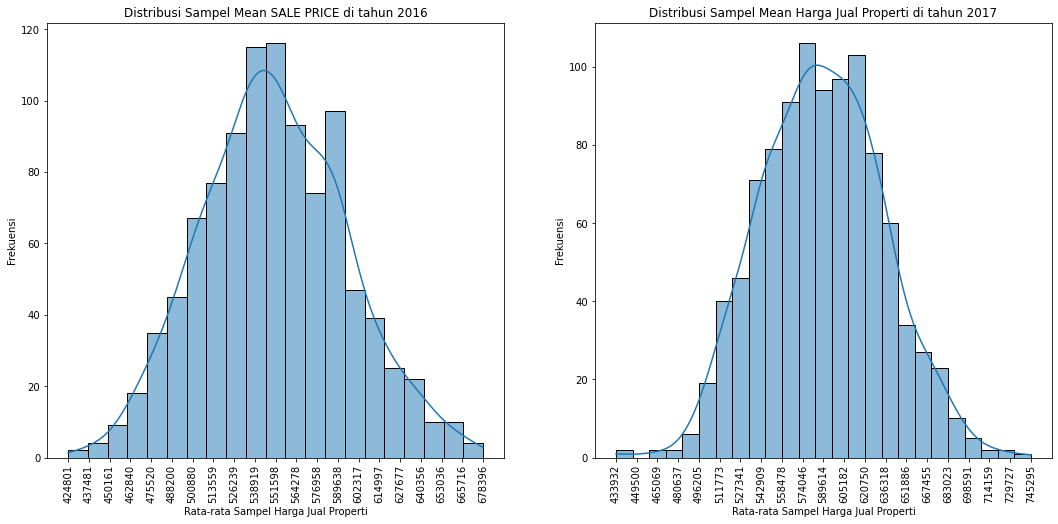

In [48]:
sample_means_2016 = [] # list yang menampung rata-rata dari sejumlah nilai acak
n = 100 # banyak nilai acak yang digunakan untuk setiap sampel nya
m = 1000

for sample in range(0,m):
    # ambil sejumlah n nilai acak dari 'SALE PRICE'
    sample_values = np.random.choice(a=sales_2016, size=n)
    
    # hitung sample mean
    sample_mean = np.mean(sample_values)
    # append ke list
    sample_means_2016.append(sample_mean)

sample_means_2017 = [] # list yang menampung rata-rata dari sejumlah nilai acak
n = 100 # banyak nilai acak yang digunakan untuk setiap sampel nya
m = 1000

for sample in range(0,m):
    # ambil sejumlah n nilai acak dari 'SALE PRICE'
    sample_values = np.random.choice(a=sales_2017, size=n)
    
    # hitung sample mean
    sample_mean = np.mean(sample_values)
    # append ke list
    sample_means_2017.append(sample_mean)
# menampilkan distribusi dari data penjualan 2016 dan 2017
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)

# Plotting for 2016
count, bin_edges_2016 = np.histogram(sample_means_2016,bins=20)
sns.histplot(sample_means_2016, kde=True, ax=ax)
ax.set_title('Distribusi Sampel Mean SALE PRICE di tahun 2016')
ax.set_xlabel('Rata-rata Sampel Harga Jual Properti')
ax.set_xticks(bin_edges_2016)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

# Plotting for 2017
count, bin_edges_2017 = np.histogram(sample_means_2017,bins=20)
sns.histplot(sample_means_2017, kde=True, ax=ax0)
ax0.set_title('Distribusi Sampel Mean Harga Jual Properti di tahun 2017')
ax0.set_xlabel('Rata-rata Sampel Harga Jual Properti')
ax0.set_xticks(bin_edges_2017)
ax0.tick_params(axis='x', labelrotation=90)
ax0.set_ylabel('Frekuensi')

## Menghitung test statistics

In [49]:
z_score, pvalue = sm.stats.ztest(sample_means_2016,sample_means_2017,alternative='two-sided')
pvalue

1.9627992839682664e-78

## Penarikan kesimpulan

In [50]:
if pvalue > 0.05:
    print("H0 diterima")
else:
    print("Ha diterima")

Ha diterima


Karena nilai p-value 5.824120169466725e-82 sangat kecil dan nilainya kurang dari atau sama dengan alpha (0.05), maka H0 yang menyatakan bahwa rata-rata harga jual properti di New York City pada tahun 2016 sama dengan rata-rata harga jual properti di New York City pada tahun 2017.

Oleh karena itu, Ha diterima, yaitu terdapat perbedaan yang signifikan antara rata-rata harga jual properti di New York City pada tahun 2016 dan 2017

# Overall Analysis
1. Kesimpulan : 95% Confidence Interval menyatakan bahwa nilai rata-rata dari luas total semua lantai bangunan properti (GROSS SQUARE FEET) di New York City dari tahun 2016 - 2017 berada dalam rentang (1825.9248896843937) sampai (1839.8270903156063) satuan luas
2. Kesimpulan : 95% Confidence Interval menyatakan bahwa nilai rata-rata dari harga jual properti di New York City dari tahun 2016 - 2017 berada dalam rentang 569650.8237149519 sampai 579511.9961050482 US Dollar
3. Kesimpulan : terdapat perbedaan yang signifikan antara rata-rata harga jual properti di New York City pada tahun 2016 dan 2017 pada level signifikansi (alpha) 0,05